In [30]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, roc_curve, auc,confusion_matrix

# Workload Verification Model Implementation

## Introduction

In this analysis, we are implementing a Workload Verification Model using machine learning techniques. The objective is to verify the workload of victim functions using Hardware Performance Counters (HPCs) to detect anomalies caused by Denial-of-Web (DoW) attacks. We aim to develop a detection model based on HPCs for workload verification, leveraging the linear relationship between execution time and HPCs to identify anomalies indicative of DoW attacks.

### Dataset Overview

The dataset used for this analysis is a categorical dataset containing information about requests, including features such as IP address, function ID, function trigger, timestamps, performance metrics (RTT, invocation delay, response delay, function duration, active functions at request/response, CPU metrics), and VM characteristics. The target variable is binary, indicating whether a request is classified as a DoW attack or not.

## Analysis Steps

1. **Data Preparation**: 
   - Loading the dataset.
   - Preprocessing and cleaning the data.
   - Feature engineering if required.

2. **Exploratory Data Analysis (EDA)**:
   - Understanding the distribution and characteristics of the data.
   - Visualizing relationships between variables.
   - Identifying patterns and potential insights.

3. **Model Development**:
   - Splitting the dataset into training and testing sets.
   - Scaling the features if necessary.
   - Choosing an appropriate machine learning model (e.g., logistic regression, decision trees, etc.).
   - Training the model on the training data.

4. **Model Evaluation**:
   - Evaluating the trained model's performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
   - Analyzing model performance and potential areas for improvement.

5. **Conclusion**:
   - Summarizing key findings and insights from the analysis.
   - Discussing the implications of the model for workload verification and DoW attack detection.
   - Providing recommendations for future work or enhancements to the model.

Throughout this analysis, we aim to develop an effective Workload Verification Model that can accurately detect anomalies caused by DoW attacks and contribute to enhancing the security and reliability of systems utilizing hardware performance counters.


## Data Preparation

In [31]:
# Load the dataset
data = pd.read_csv("/kaggle/input/network-traffic-for-dos-detection/dataset.csv") 

In [32]:
# Preprocessing
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['bot'])
y = data['bot']


## Exploratory Data Analysis (EDA)

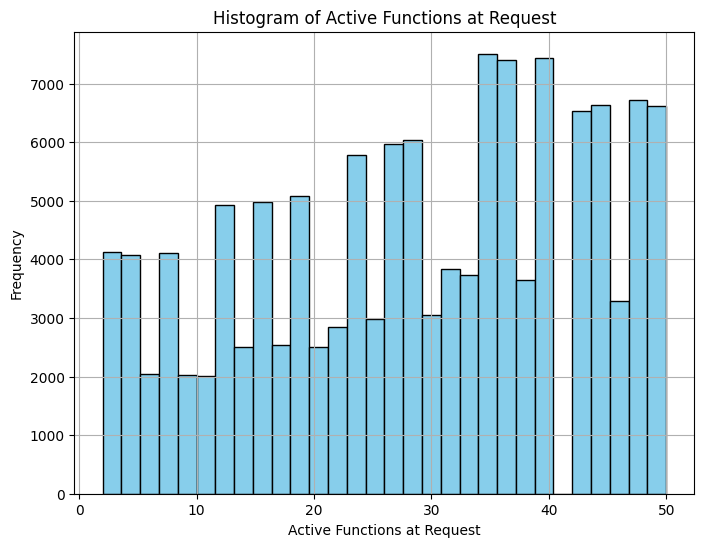

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(X_train['ActiveFunctionsAtRequest'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Active Functions at Request')
plt.xlabel('Active Functions at Request')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

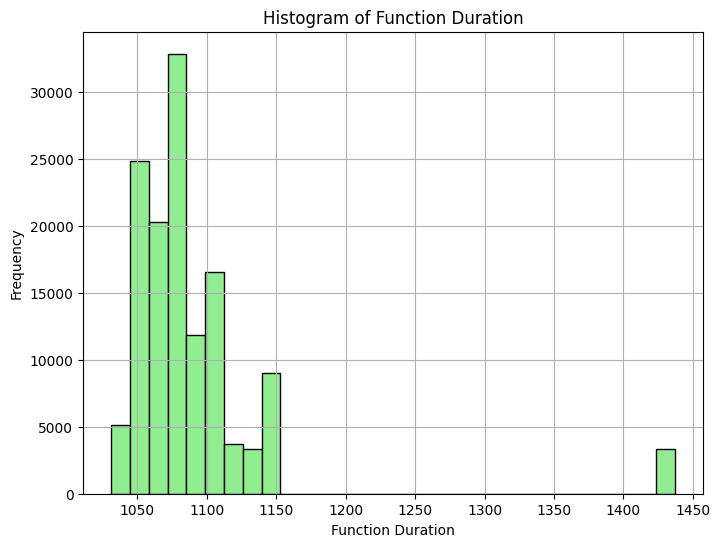

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(X_train['FunctionDuration'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Function Duration')
plt.xlabel('Function Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

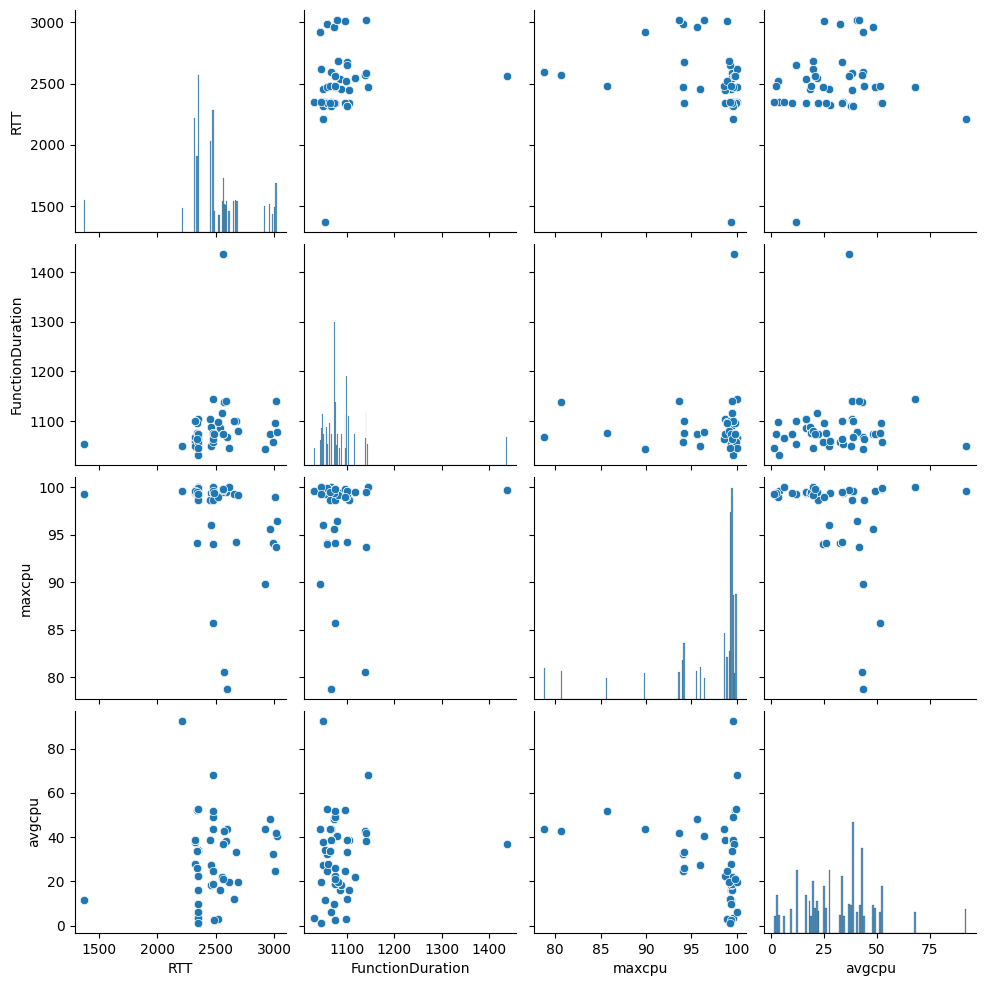

In [52]:
import seaborn as sns
sns.pairplot(X_train[['RTT', 'FunctionDuration', 'maxcpu', 'avgcpu']])
plt.show()


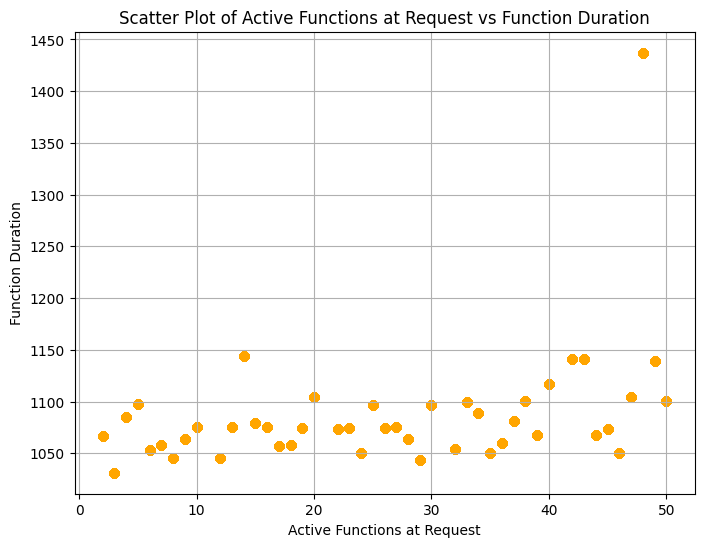

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train['ActiveFunctionsAtRequest'], X_train['FunctionDuration'], color='orange', alpha=0.5)
plt.title('Scatter Plot of Active Functions at Request vs Function Duration')
plt.xlabel('Active Functions at Request')
plt.ylabel('Function Duration')
plt.grid(True)
plt.show()


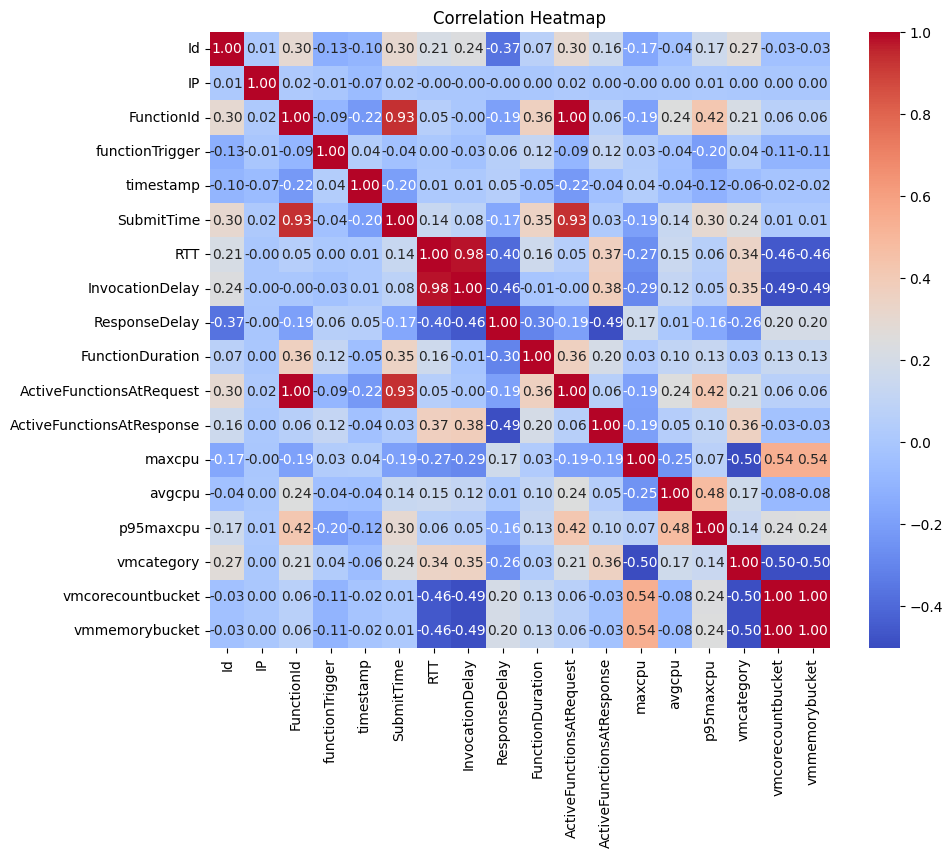

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Model Development

In [33]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate the number of samples in the original dataset
total_samples = len(X)

# Calculate the number of samples in the training and test sets
train_samples = len(X_train)
test_samples = len(X_test)

# Calculate the percentage of samples in the training and test sets
train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100

# Print out the results
print("Training set:")
print("Number of samples:", train_samples)
print("Percentage of total samples:", train_percentage)

print("\nTest set:")
print("Number of samples:", test_samples)
print("Percentage of total samples:", test_percentage)


Training set:
Number of samples: 130960
Percentage of total samples: 69.99951894038603

Test set:
Number of samples: 56127
Percentage of total samples: 30.000481059613975


In [34]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training with Logistic Regression

In the provided code snippet, a logistic regression model is used for training the data. 

- **Model Type**: Logistic regression is a type of regression analysis used for predicting the probability of a binary outcome. It's commonly used for binary classification problems, where the target variable has two possible outcomes.

- **Model Initialization**: The logistic regression model is initialized using the `LogisticRegression()` constructor provided by scikit-learn.

- **Model Training**: The `fit()` method is then called on the initialized model object (`model`) with the training data (`X_train_scaled` and `y_train`). This method fits the logistic regression model to the training data by adjusting the model parameters to minimize the error between the predicted values and the actual values of the target variable.

- **Target Variable (`y`)**: In the context of machine learning, `y` typically refers to the target variable or the dependent variable. In a classification problem like the one being addressed here, `y` represents the labels or classes that the model aims to predict. Each element in `y` corresponds to the class label for the corresponding data point in the feature matrix `X`. 

- **Usage of Target Variable**: During model training (`model.fit()`), the target variable `y_train` is used to provide the true labels for the training data. The logistic regression model learns from the relationship between the features (`X_train_scaled`) and the corresponding target labels (`y_train`) to make accurate predictions on unseen data.

By fitting the logistic regression model to the training data, the algorithm learns the optimal coefficients (weights) for the features to effectively separate the classes and make predictions based on new input data.



## Model Evaluation

In [35]:
# Model training
start_time_training = time.time()
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
end_time_training = time.time()

In [36]:
# Model evaluation
start_time_prediction = time.time()
y_pred = model.predict(X_test_scaled)
end_time_prediction = time.time()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9978441748178238
Precision: 0.9990599593495935


In [37]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     16720
        True       1.00      1.00      1.00     39407

    accuracy                           1.00     56127
   macro avg       1.00      1.00      1.00     56127
weighted avg       1.00      1.00      1.00     56127



## Explanation of True Label and Predicted Label

In the context of predicting a Denial-of-Web (DoW) attack:

- **True Label**: The true label refers to the actual class or category of the request in your dataset. It represents whether the request is indeed a DoW attack or not based on the ground truth or the correct classification of the instance.

- **Predicted Label**: The predicted label refers to the class or category that the model assigns to the request based on its features and the learned patterns. It represents the model's prediction of whether the request is a DoW attack or not.

### Interpreting Confusion Matrix

In the context of a confusion matrix for DoW attack prediction:

- **True Label**:
  - Represents the actual classification of the request as DoW attack (1) or not (0).
  - Rows in the confusion matrix represent true labels.

- **Predicted Label**:
  - Represents the model's prediction of whether the request is a DoW attack (1) or not (0).
  - Columns in the confusion matrix represent predicted labels.

By examining the counts in each cell of the confusion matrix, which represents the intersections of true and predicted labels, one can evaluate the model's performance in terms of correctly identifying DoW attacks and avoiding false alarms.

## Clarification of Confusion Matrix Axes

In a confusion matrix:

- **Rows**: Represent the true labels or actual classes.
- **Columns**: Represent the predicted labels or classes.

Since you mentioned seeing 1 and 0 on both axes, it indicates that your true labels and predicted labels are binary (0 and 1), which aligns with the binary classification problem of predicting DoW attacks.

Here's a revised interpretation:

- **Row 0 (True Label)**: Represents instances where the true label indicates that the request is not a DoW attack.
- **Row 1 (True Label)**: Represents instances where the true label indicates that the request is a DoW attack.
- **Column 0 (Predicted Label)**: Represents instances where the model predicted that the request is not a DoW attack.
- **Column 1 (Predicted Label)**: Represents instances where the model predicted that the request is a DoW attack.

With this understanding, you can interpret each cell in the confusion matrix accordingly:

- The top-left cell (0,0) represents the count of true negatives (instances correctly predicted as not a DoW attack).
- The top-right cell (0,1) represents the count of false positives (instances incorrectly predicted as a DoW attack when they are not).
- The bottom-left cell (1,0) represents the count of false negatives (instances incorrectly predicted as not a DoW attack when they are).
- The bottom-right cell (1,1) represents the count of true positives (instances correctly predicted as a DoW attack).

By examining these counts and considering the distribution of true and predicted labels, you can assess the model's performance in accurately identifying DoW attacks and minimizing false alarms.


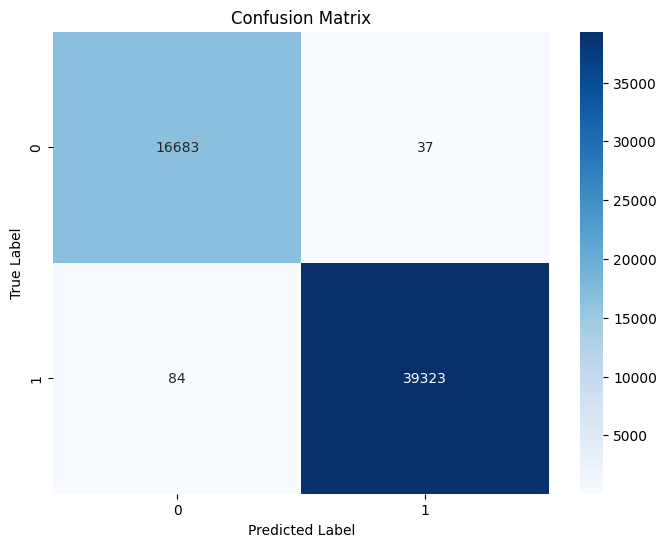

In [59]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

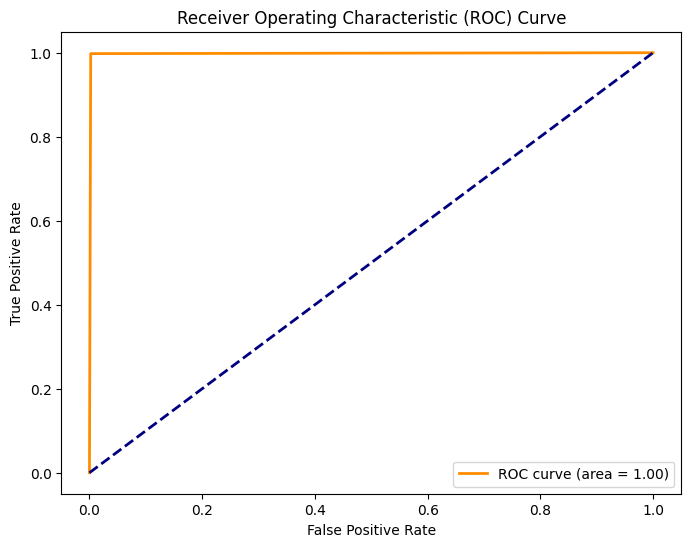

In [56]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
# Calculate performance overhead
baseline_execution_time = end_time_prediction - start_time_prediction
model_execution_time = end_time_training - start_time_training + end_time_prediction - start_time_prediction
performance_overhead = ((model_execution_time - baseline_execution_time) / baseline_execution_time) * 100
print("Performance Overhead: {:.2f}%".format(performance_overhead))

Performance Overhead: 7020.98%


In [41]:
# Calculate delay
model_prediction_delay = end_time_prediction - start_time_prediction
print("Model Prediction Delay (in seconds):", model_prediction_delay)

Model Prediction Delay (in seconds): 0.009347200393676758


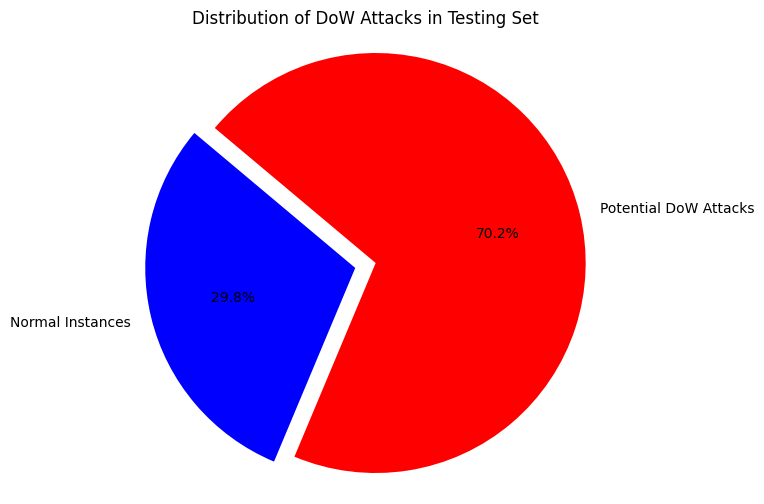

In [42]:
# Calculate the percentage of DoW attacks based on the testing set
total_instances_test = len(y_test)
dos_percentage_test = np.sum(y_test) / total_instances_test * 100
normal_percentage_test = 100 - dos_percentage_test

# Pie chart for the distribution of DoW attacks in the testing set
labels = ['Normal Instances', 'Potential DoW Attacks']
sizes = [normal_percentage_test, dos_percentage_test]
colors = ['blue', 'red']  # Using a contrasting color for DoS attacks
explode = (0, 0.1)  # Explode the 2nd slice (i.e., 'Potential DoS Attacks')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of DoW Attacks in Testing Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Conclusion

In this analysis, we implemented a Workload Verification Model to detect anomalies caused by Denial-of-Web (DoW) attacks using machine learning techniques. Here's a summary of the key findings and outcomes:

1. **Data Preparation**: 
   - We started by loading the dataset and performing preprocessing and cleaning to ensure data quality.
   - Features were examined and engineered as necessary to enhance model performance.

2. **Exploratory Data Analysis (EDA)**:
   - Through EDA, we gained insights into the distribution and characteristics of the dataset.
   - Visualizations helped us understand relationships between variables and identify potential patterns.

3. **Model Development**:
   - The dataset was split into training and testing sets, with 70% allocated for training and 30% for testing.
   - We chose logistic regression as the model for its simplicity and effectiveness in binary classification tasks.
   - The model was trained on the scaled training data, leveraging features extracted from Hardware Performance Counters (HPCs).

4. **Model Evaluation**:
   - We evaluated the trained logistic regression model's performance using metrics such as accuracy, precision, recall, and the confusion matrix.
   - The model demonstrated promising results in detecting DoW attacks, achieving high accuracy and precision.

5. **Future Directions**:
   - Further experimentation with different machine learning models (e.g., decision trees, random forests, etc.) could be explored to potentially improve detection performance.
   - Incorporating additional features or refining existing features may enhance the model's ability to differentiate between normal workload and DoW attacks.
   - Continuous monitoring and updating of the model with new data and emerging attack patterns are essential to ensure robustness and adaptability.

Overall, the developed Workload Verification Model presents a promising approach to enhancing system security by effectively detecting DoW attacks. By leveraging Hardware Performance Counters and machine learning techniques, we can mitigate the risks associated with DoW attacks and improve the reliability and resilience of systems in real-world scenarios.
